# 6. 지도학습(회귀)

## 1. 선형 회귀

선형 회귀

- 단순 선형 회귀 : 독립변수가 1개인 선형 회귀

- 다중 선형 회귀 : 독립변수가 2개 이상인 선형 회귀

비용함수(cost function)

-손실함수(loss function), 목적함수(objective function)

- 오차(error) : 실제값과 예측값의 차이

-평균 제곱 오차를 최소화 하는 파라미터를 찾음

![](./img_12.png)

실제값과 예측값의 거리를 찾음 거리가 가까울수록 좋음

경사하강법(Gradient Descent)

- 경사하강법을 활용해 최소 에러값을 찾음

![](./img_13.png)

In [1]:
#라이브러리 불러오기

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#데이터 불러오기
#데이터 생성

from sklearn.datasets import load_diabetes #당뇨병 데이터셋 불러오기

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [3]:
#train sample
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [4]:
#타겟 샘플
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

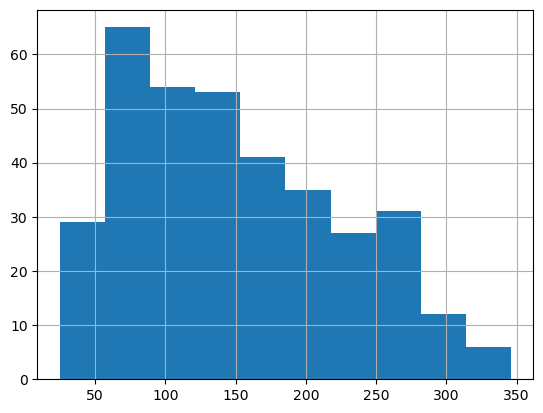

In [5]:
#타겟 확인
y_train.hist()

In [9]:
#선형 회귀 모델 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

2707.6318521641574

## 2. 릿지회귀

회귀를 위한 선형 모델

규제(Regularization) 적용

- 오버피팅이 되지 않도록 함

- 규제방식 : L2 규제

- 파라미터(Alpha) 값을 활용해 조절

- Alpha 값이 커질수록 회귀 계수 값을 작게 만듬

![](./img_14.png)

In [12]:
# 릿지회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

# 오차가 더 커졌다는 것은 더 좋지 않은 모델이라는 의미

3522.1191842072667

In [16]:
# 회귀 계수
coef = pd.DataFrame(model.coef_, index=X_train.columns, columns=['alpha=1'])
coef

,alpha=1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [17]:
#릿지 회귀(Alpha=10)
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

5521.884843903383

In [18]:
# 회귀 계수(Alpha=10)
coef['alpha=10'] = model.coef_
coef

,alpha=1,alpha=10
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


In [19]:
#릿지 회귀(Alpha=0.1)
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

2744.90267421467

In [20]:
# 회귀 계수(Alpha=0.1)
coef['alpha=0.1'] = model.coef_
coef

,alpha=1,alpha=10,alpha=0.1
age,31.293421,16.703166,4.275162
sex,-71.448655,-1.796418,-205.210484
bmi,267.605962,61.026376,450.909749
bp,197.362492,47.434846,331.923682
s1,14.613257,18.491238,-84.311149
s2,-13.884237,13.440104,-54.662514
s3,-124.649836,-35.542087,-158.706512
s4,106.212967,38.896140,114.066890
s5,221.068493,55.276290,391.231834
s6,101.202546,35.868345,78.555458


In [21]:
#릿지 회귀(Alpha=0.01)
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.01)
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

2675.811312404543

In [23]:
# 회귀 계수(Alpha=0.01)
coef['alpha=0.01'] = model.coef_
coef

,alpha=1,alpha=10,alpha=0.1,alpha=0.01
age,31.293421,16.703166,4.275162,-7.293063
sex,-71.448655,-1.796418,-205.210484,-242.212217
bmi,267.605962,61.026376,450.909749,482.043260
bp,197.362492,47.434846,331.923682,365.353880
s1,14.613257,18.491238,-84.311149,-441.489567
s2,-13.884237,13.440104,-54.662514,206.076459
s3,-124.649836,-35.542087,-158.706512,-24.375056
s4,106.212967,38.896140,114.066890,141.806880
s5,221.068493,55.276290,391.231834,561.312338
s6,101.202546,35.868345,78.555458,58.588744


In [24]:
#릿지회귀 연습문제

In [26]:
# Q. 릿지 회귀의 alpha 값을 0.001, 0.01, 0.05, 0.1, 1, 10을 각각 넣어보고,
# 어떤 alpha 값이 가장 mean squared error가 작은지 찾아보세요.
# 힌트 : for문을 사용하면 좀더 효율적으로 퀴즈를 풀 수 있습니다.
from sklearn.linear_model import Ridge
import pandas as ps
alpha_value = [0.001,0.01,0.05,0,1,1,10]
coef = []
for i in alpha_value:
    model = Ridge(alpha=i)
    model.fit(X_train, y_train)
    model.predict(X_test)
    mean_squared_error(y_test, model.predict(X_test))
    coef.append(pd.DataFrame(model.coef_, index=X_train.columns, columns=[f'alpha={i}']))
coef_df = pd.concat(coef, axis=1)

coef_df


,alpha=0.001,alpha=0.01,alpha=0.05,alpha=0,alpha=1,alpha=1,alpha=10
age,-12.875946,-7.293063,-0.508850,-14.224890,31.293421,31.293421,16.703166
sex,-250.863173,-242.212217,-223.345659,-252.589756,-71.448655,-71.448655,-1.796418
bmi,479.520459,482.043260,469.447848,478.243826,267.605962,267.605962,61.026376
bp,373.038388,365.353880,348.368885,374.565795,197.362492,197.362492,47.434846
s1,-903.695809,-441.489567,-146.952481,-1027.290590,14.613257,14.613257,18.491238
s2,571.685411,206.076459,-18.297550,669.717479,-13.884237,-13.884237,13.440104
s3,174.829975,-24.375056,-141.658486,228.646717,-124.649836,-124.649836,-35.542087
s4,194.433758,141.806880,115.860926,209.055061,106.212967,106.212967,38.896140
s5,740.629804,561.312338,432.508101,787.871969,221.068493,221.068493,55.276290
s6,52.924300,58.588744,69.578796,51.760505,101.202546,101.202546,35.868345


## 3. 라쏘 회귀
![](./img_15.png)

L2 규제 대비 중요한 피처만 선택하는 특성이 있어 나머지는 0을 만들어 버림

Alpha 3으로 했을때는 0.1대비 중요하다고 생각파는 피처만 남겨두고 나머지는 0으로 만듬

In [27]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1) # 기본값이 1
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

4179.152642946343

In [28]:
# 회귀 계수
coef = pd.DataFrame(model.coef_, index=X_train.columns, columns=['alpha=1'])
coef

,alpha=1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [29]:
# 라쏘 회귀(Alpha=2)
from sklearn.linear_model import Lasso
model = Lasso(alpha=2)
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

6398.637179449031

In [31]:
# 회귀 계수(Alpha=2)
coef['alpha=2'] = model.coef_
coef

,alpha=1,alpha=2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [32]:
# 라쏘 회귀(Alpha=0.05)
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))


2703.4583679188177

In [33]:
# 회귀 계수(Alpha=0.05)
coef['alpha=0.05'] = model.coef_
coef

,alpha=1,alpha=2,alpha=0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


In [36]:
# 라쏘 연습문제
# Q. 라쏘 회귀의 alpha 값을 0.001, 0.01, 0.05, 0.1, 1, 10을 각각 넣어보고,
# 어떤 alpha 값이 가장 mean squared error가 작은지 찾아보세요.
from sklearn.linear_model import Lasso
import pandas as pd
alpha_value = [0.001,0.01,0.05,0,1,1,10]
coef = []
mse_alpha = []
for i in alpha_value:
    model =Lasso(alpha=i)
    model.fit(X_train, y_train)
    model.predict(X_test)
    mse = mean_squared_error(y_test, model.predict(X_test))
    coef.append(pd.DataFrame(model.coef_, index=X_train.columns, columns=[f'alpha={i}']))
    mse_alpha.append((mse, i))

coef_df = pd.concat(coef, axis=1)
print(coef_df)
min_mse_alpha = min(mse_alpha)
print(f"가장 작은 mean squared error를 가진 alpha 값: {min_mse_alpha[1]} (MSE: {min_mse_alpha[0]})")

     alpha=0.001  alpha=0.01  alpha=0.05      alpha=0     alpha=1     alpha=1  \
age   -12.866944   -2.720658   -0.000000   -14.224890    0.000000    0.000000   
sex  -251.292080 -239.362392 -198.948213  -252.589756   -0.000000   -0.000000   
bmi   478.850419  484.708977  487.198584   478.243827  343.589790  343.589790   
bp    373.333822  364.253167  340.490360   374.565794   46.369923   46.369923   
s1   -957.796590 -500.350679  -95.576361 -1027.290574    0.000000    0.000000   
s2    616.335189  254.427235   -0.000000   669.717467    0.000000    0.000000   
s3    195.960670   -0.000000 -189.867452   228.646710   -0.000000   -0.000000   
s4    197.075688  139.245552   10.487703   209.055059    0.000000    0.000000   
s5    762.509258  591.415053  457.332197   787.871963  245.170617  245.170617   
s6     51.787040   50.870090   39.292925    51.760505    0.000000    0.000000   

     alpha=10  
age       0.0  
sex       0.0  
bmi       0.0  
bp        0.0  
s1        0.0  
s2        0.

/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_45100/1459781263.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ralphpark/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.157e+05, tolerance: 2.035e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mode

## 4. 엘라스틱넷 회귀

회귀를 위한 선형 모델

L2규제와 L1 규제 결합한 회귀

시간이 상대적으로 오래 걸림

![](./img_16.png)

In [37]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1) # 기본값이 1
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

6539.270961171604

In [38]:
# 엘라스틱넷 회귀(Alpha=0.0001)
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.6) # L1규제 비율을 정할 수 있음, 기본값이 0.5
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

2675.6031657225312

In [40]:
#실습문제
# Q. 엘라스틱넷 회귀의 alpha 값을 0.0001로 설정하고,
# l1 규제의 비율 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 중
# 어떤 비율일 때 mean squared error가 가장 작은지 찾아보세요.
from sklearn.linear_model import ElasticNet
import pandas as pd
alpha_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
coef = []
mse_alpha = []
for i in alpha_value:
    model =ElasticNet(alpha=0.0001, l1_ratio = i)
    model.fit(X_train, y_train)
    model.predict(X_test)
    mse = mean_squared_error(y_test, model.predict(X_test))
    coef.append(pd.DataFrame(model.coef_, index=X_train.columns, columns=[f'L1={i}']))
    mse_alpha.append((mse, i))

coef_df = pd.concat(coef, axis=1)
print(coef_df)
min_mse_alpha = min(mse_alpha)
print(f"가장 작은 mean squared error를 가진 alpha 값: {min_mse_alpha[1]} (MSE: {min_mse_alpha[0]})")

         L1=0.1      L1=0.2      L1=0.3      L1=0.4      L1=0.5      L1=0.6  \
age   -2.786105   -3.302796   -3.863803   -4.484376   -5.188428   -6.015735   
sex -230.942642 -232.519786 -234.152572 -235.856985 -237.658051 -239.597359   
bmi  476.097749  477.314195  478.482402  479.581305  480.577902  481.417355   
bp   355.236608  356.660870  358.133713  359.669051  361.288721  363.029107   
s1  -206.882031 -225.348327 -247.839056 -275.861581 -311.783503 -359.548299   
s2    24.612650   38.415466   55.436132   76.875979  104.620363  141.807274   
s3  -120.164565 -113.086803 -104.284341  -93.100152  -78.500283  -58.759760   
s4   119.611393  121.021398  122.858437  125.298818  128.622707  133.301380   
s5   462.613416  471.125117  481.190936  493.382958  508.598675  528.331451   
s6    65.364628   64.447112   63.483805   62.463351   61.368114   60.168969   

         L1=0.7      L1=0.8      L1=0.9  
age   -7.037757   -8.384127  -10.407944  
sex -241.749590 -244.275604 -247.496966  
bmi 

## 5. 랜덤포레스트 & XGBoost
